In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv(r'E:\DataScience\Kaggle\Digiledge\1stOne\train.csv')
test=pd.read_csv(r'E:\DataScience\Kaggle\Digiledge\1stOne\test.csv')

In [3]:
print("Shape of Training Data: ", train.shape)
print("Shape of Test Data: ", test.shape)

Shape of Training Data:  (188318, 132)
Shape of Test Data:  (125546, 131)


In [4]:
# Lets find out the missing Data in training and Testing data
print("Number of missing values in train data",train.isnull().sum().sum())
print("Number of missing values in test data",test.isnull().sum().sum())

Number of missing values in train data 0
Number of missing values in test data 0


In [5]:
# Since the ID feature doesnot constitute to the prediction of the loss variable so lets drop it
train_data=train.drop(['id'], axis=1)
test_data=test.drop(['id'], axis=1)

In [6]:
# Lets Split the Categorical Features and Continuous Features
cont_feature=[x for x in train_data.select_dtypes(exclude=['object']).columns]
catg_feature=[x for x in train_data.select_dtypes(include=['object']).columns]

In [11]:
# Removing the loss variable from the list
cont_feature.remove('loss')

In [12]:
# Applying lable encoder on the categorical variables
from sklearn.preprocessing import LabelEncoder
lableEnc=LabelEncoder()
def EncodingLables(dataset):
    for column in catg_feature:
        dataset[column]=lableEnc.fit_transform(dataset[column])
    return dataset

In [13]:
train_data_lab=EncodingLables(train_data)
test_data_lab=EncodingLables(test_data)

In [14]:
print("Shape of Training Data: ", train_data_lab.shape)
print("Shape of Test Data: ", test_data_lab.shape)

Shape of Training Data:  (188318, 131)
Shape of Test Data:  (125546, 130)


In [16]:
# Features and Target value 
target=train_data_lab['loss']
features= train_data_lab.drop(['loss'], axis=1)

In [17]:
# PCA Analysis
from sklearn.decomposition import PCA
def pcaAnalysis(dataset):
    pca=PCA(n_components=4)
    pca.fit(dataset)
    dataset=pca.transform(dataset)
    return dataset

# Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler
def minmaxSac(dataset):
    sc = MinMaxScaler()
    dataset = sc.fit_transform(dataset)
    return dataset

In [23]:
# Min Max Scaling
features1=minmaxSac(features)
test_data_lab=minmaxSac(test_data)
# PCA Analysis for testing and Training Data
features1=pcaAnalysis(features)
test_data_lab=pcaAnalysis(test_data)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


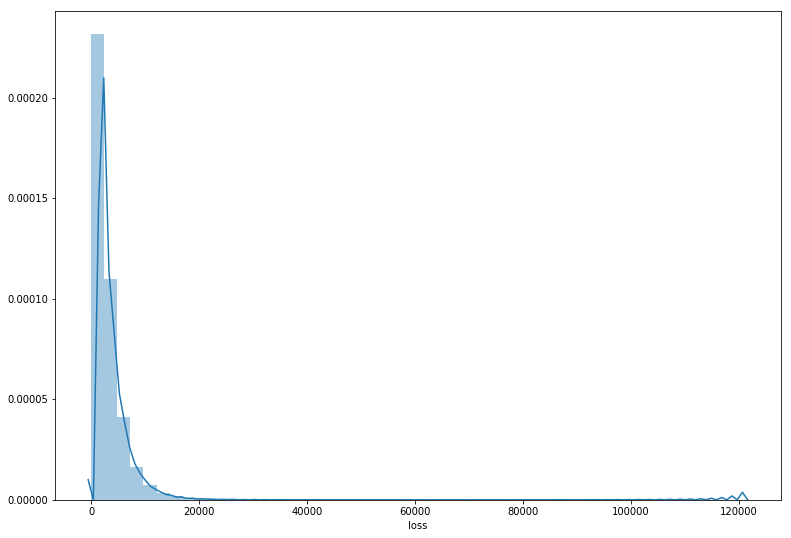

In [20]:
# Checking the loss variable
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(13,9))
sns.distplot(target)

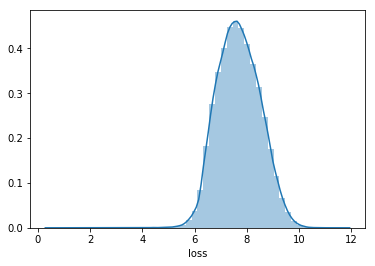

In [21]:
# Removing the Data Skewness
target1=np.log1p(target)
sns.distplot(target1)

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(features1, target1, test_size = 0.2, random_state=42)

# Decision Tree Analysis

In [46]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
val_mae = mean_absolute_error(y_pred, y_test)
print(" Value of Mean Absolute Error : ",val_mae)

 Value of Mean Absolute Error :  0.8338991326358726


In [47]:
test_pred= model.predict(test_data_lab)

# Random Forest Analysis

In [44]:
from sklearn.ensemble import RandomForestRegressor
RFmodel = RandomForestRegressor(random_state=1)
RFmodel.fit(X_train, y_train)
y_pred_rf = RFmodel.predict(X_test)
val_mae = mean_absolute_error(y_pred_rf, y_test)
print(" Value of Mean Absolute Error : ",val_mae)

 Value of Mean Absolute Error :  0.6556089850482352


In [49]:
test_pred_RF=RFmodel.predict(test_data_lab)

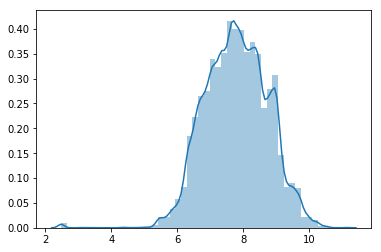

In [31]:
sns.distplot(test_pred)

In [50]:
# Getting the predicted values back to normal for DT
test_pred_natural_DT = np.e**test_pred - 1
# Getting the predicted values back to normal for RF
test_pred_natural_RF = np.e**test_pred_RF - 1

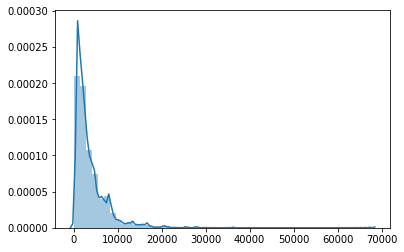

In [35]:
sns.distplot(test_pred_natural)

In [51]:
#Creating the submission files for Decision Tree
submission_file = pd.DataFrame({'ID':test.id, 'predictedLoss':test_pred_natural_DT})
submission_file = submission_file[['ID', 'predictedLoss']]
submission_file.to_csv(r"E:\DataScience\Kaggle\Digiledge\1stOne\submission_file_DT.csv", index=False)

In [52]:
#Creating the submission files for Decision Tree
submission_file = pd.DataFrame({'ID':test.id, 'predictedLoss':test_pred_natural_RF})
submission_file = submission_file[['ID', 'predictedLoss']]
submission_file.to_csv(r"E:\DataScience\Kaggle\Digiledge\1stOne\submission_file_DT.csv", index=False)